# Google Drive をマウントする

In [1]:
# 必要なライブラリを読み込む
from google.colab import drive 

# Google ドライブをマウントする
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


必要なモジュールをインポートします。

*   pandas：表データの前処理・集計に便利な型「データフレーム」を提供してくれるライブラリ
*   sklearn：Scikit-learn。pythonで機械学習を実行するために便利なモジュールを集めてあるパッケージ。今回は以下のモジュールを使用する。
> *   mixture：混合モデルを利用する際に便利なモジュールがいくつか用意されています。今回はGaussianMixture（混合ガウス分布によるクラスタリングを実行してくれるメソッド）をインポートします。
*   matplotlib：pythonでグラフ描画に使われるライブラリ
*   seaborn：pythonでグラフ描画に使われるライブラリ（matplotlibより美しい）

※ 比較のため決定木用モジュールもインポートしておく

In [2]:
# pandas のインポート
import pandas as pd

# 混合ガウスモデル用ライブラリをインポート
from sklearn.mixture import GaussianMixture

# グラフ描画用ライブラリ matplotlib、seaborn をインポート
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# データの読み込み

In [3]:
# 買物データを読み込む
ECSiteShopping = pd.read_csv("drive/My Drive/DATA-SCI-TECH-EXERCISE/DATA/ECsiteShopping.csv")
ECSiteShopping.head()

,UserID,Appliances_1,Comic_1,Computer_1,Foods_1,Game_1,Hobby_1,Kitchen_1,Magazine_1,Movie_1,Music_1,Pharmaceuticals_1,Sports_1,Subscription_1,Total_1,Appliances_2,Comic_2,Computer_2,Foods_2,Game_2,Hobby_2,Kitchen_2,Magazine_2,Movie_2,Music_2,Pharmaceuticals_2,Sports_2,Subscription_2,Total_2
0,U00001,0.0,0.0,0.0,0.379526,0.0,0.0,0.273581,0.0,0.0,0.0,0.212785,0.0,0.134108,22370,0.0,0.0,0.0,0.245083,0.0,0.0,0.567593,0.0,0.0,0.0,0.093662,0.0,0.093662,32030
1,U00002,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000
2,U00003,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000
3,U00006,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000
4,U00007,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000


In [4]:
# 概要を確認する
ECSiteShopping.describe()

,Appliances_1,Comic_1,Computer_1,Foods_1,Game_1,Hobby_1,Kitchen_1,Magazine_1,Movie_1,Music_1,Pharmaceuticals_1,Sports_1,Subscription_1,Total_1,Appliances_2,Comic_2,Computer_2,Foods_2,Game_2,Hobby_2,Kitchen_2,Magazine_2,Movie_2,Music_2,Pharmaceuticals_2,Sports_2,Subscription_2,Total_2
count,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,1.330800e+04,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,1.330800e+04
mean,0.009034,0.009989,0.229424,0.078974,0.006882,0.022466,0.209823,0.001211,0.112011,0.139127,0.049900,0.051471,0.079689,2.376253e+05,0.009573,0.010254,0.225526,0.077037,0.007065,0.022777,0.207638,0.001257,0.109474,0.138217,0.049606,0.049354,0.092222,2.188467e+05
std,0.053601,0.019704,0.295527,0.115633,0.023251,0.046067,0.233182,0.003853,0.181636,0.181811,0.064384,0.121083,0.219297,2.828794e+05,0.053441,0.020479,0.298160,0.116809,0.022770,0.052536,0.233984,0.004048,0.177038,0.179996,0.069280,0.124499,0.247936,2.617804e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.683000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.829500e+04
50%,0.000000,0.000000,0.000000,0.020724,0.000000,0.000000,0.129102,0.000000,0.005054,0.080611,0.029574,0.000000,0.005435,1.067350e+05,0.000000,0.000000,0.000000,0.006283,0.000000,0.000000,0.122584,0.000000,0.003085,0.079783,0.027464,0.000000,0.006245,9.867500e+04
75%,0.000000,0.015794,0.480567,0.137031,0.000000,0.024151,0.360385,0.000000,0.143519,0.189475,0.074679,0.000000,0.040052,3.609950e+05,0.000000,0.015368,0.479538,0.132632,0.000000,0.017818,0.366170,0.000000,0.143157,0.187352,0.074531,0.000000,0.036470,3.305050e+05
max,0.994378,0.358044,1.000000,1.000000,0.935223,0.910516,1.000000,0.071713,1.000000,1.000000,1.000000,0.845701,1.000000,1.331570e+06,0.986804,0.312635,0.992696,1.000000,0.422199,1.000000,1.000000,0.087156,1.000000,1.000000,1.000000,1.000000,1.000000,1.312090e+06


# データの準備
* このケースでは標準化は行わない（全て同じ尺度であるため）が、尺度が異なる変数を使ってクラスタリングを行う際は、何かしらのスケーリング（例：標準化）を行う事が好ましい。

In [5]:
# 利用する変数を取得（今回は上半期データを利用）
columnList = ["Appliances_1","Comic_1","Computer_1","Foods_1","Game_1","Hobby_1","Kitchen_1","Magazine_1","Movie_1","Music_1","Pharmaceuticals_1","Sports_1","Subscription_1"]
X = ECSiteShopping.loc[:,columnList]

# 混合ガウスモデルによるクラスタリング
*   n_conponents：クラスターの数を指定します。
*   random_state：分割の閾値を決めるときに乱数をしようする場合があり、その際のシードの値を入力します。（値を定めておくと処理の再現性が得られます）

In [6]:
# 混合ガウスモデルを実施し、クラスターを構築する
clf = GaussianMixture(n_components=6, random_state=1234)
clf.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=1234, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [7]:
# クラスター番号を付与
X["Cluster"] = clf.predict(X)

In [8]:
# クラスター毎の件数を数える
X["Cluster"].value_counts()

3    5482
5    2598
2    2187
1    1591
0     802
4     648
Name: Cluster, dtype: int64

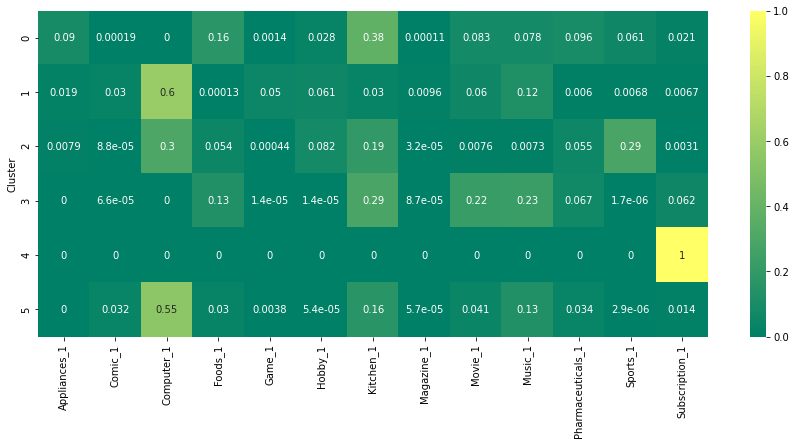

In [9]:
# クラスター毎の特徴を読み取る
plt.figure(figsize=(15,6))
sns.heatmap(X.groupby("Cluster").mean(), annot=True, cmap="summer")

# 指標（BIC）に基づくクラスター数の検討

Text(0, 0.5, 'BIC')

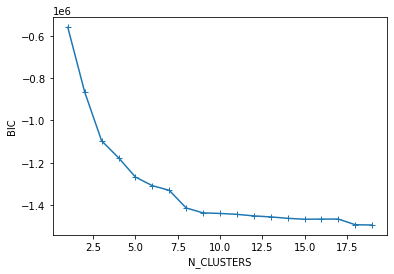

In [10]:
# BICによりクラスター数の検討を行う
bic_list = []
for i in range(1,20):
  clf = GaussianMixture(n_components=i, random_state=1234)
  clf.fit(X)
  bic = clf.bic(X)
  bic_list.append(bic)

# グラフ化
plt.plot(range(1,20), bic_list, marker='+')
plt.xlabel('N_CLUSTERS')
plt.ylabel('BIC')